## 미니 배치와 데이터 로드

#### 1. Mini batch & Batch size

만약 데이터 양이 기하급수적으로 많다면 전체 데이터에 대해 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요하다. 메모리의 한계로 계산이 불가능할 수도 있다.   
그래서 전체 데이터를 작은 단위로 나누어서 해당 단위로 학습을 해야 한다. 이것이 mini batch 이다.

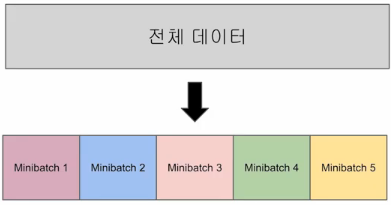

mini batch 학습을 하게되면 mini batch 만큼만 가져가서 해당 배치에 대한 cost를 계산하고 경사 하강법을 수행한다. 그 후 그다음 mini batch에 대해 같은 방법을 수행한다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1Epoch가 끝나게 된다.

- batch size는 보통 2의 제곱수를 사용한다. 그 이유는 CPU와 GPU의 메모리가 2의 배수여서 batch size가 2의 제곱수일 경우 데이터 송수신의 효율을 높일 수 있다고 한다.

#### 2. Iteration

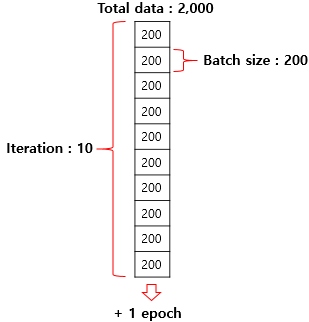

Iteration은 한 번의 epoch 내에서 이루어지는 parameter인 W와 b의 업데이트 횟수이다.   
전체 데이터가 2000, batch size = 200이면 iteration의 수는 총 10개이다. 이는 한 번의 epoch 당 parameter 업데이트가 10번 이루어짐을 말한다.

#### 3. 데이터 로드하기 (Data Load)

PyTorch에서는 데이터를 쉽게 다루기 위해 Dataset과 DataLoader를 제공한다고 한다. 이를 사용하여 mini batch 학습, 데이터 shuffle, 병렬 처리까지 간단히 수행할 수 있다.   
기본적인 사용 방법은 Dataset을 정의한 후 이를 DataLoader에 전달하는 것이다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [3]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [4]:
dataset = TensorDataset(x_train, y_train)

In [5]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [6]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [8]:
# visualize
EPOCH = 20

for epoch in range(EPOCH + 1):
    for batch_idx, samples in enumerate(dataloader):
        print(batch_idx)
        print(samples)

0
[tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]]), tensor([[196.],
        [142.]])]
1
[tensor([[89., 91., 90.],
        [73., 80., 75.]]), tensor([[180.],
        [152.]])]
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
0
[tensor([[93., 88., 93.],
        [73., 80., 75.]]), tensor([[185.],
        [152.]])]
1
[tensor([[89., 91., 90.],
        [73., 66., 70.]]), tensor([[180.],
        [142.]])]
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
0
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
1
[tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]), tensor([[180.],
        [196.]])]
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
0
[tensor([[73., 80., 75.],
        [93., 88., 93.]]), tensor([[152.],
        [185.]])]
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
2
[tensor([[89., 91., 90.]]), tensor([[180.]])]
0
[tensor([[89., 91., 90.],
        [73., 80., 75.]]), tensor([[180.],
    

In [10]:
EPOCH = 20

for epoch in range(EPOCH + 1):
    for batch_idx, samples in enumerate(dataloader):
        
        x_train, y_train = samples
        
        prediction = model(x_train)
        
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost : {:.6f}'
              .format(epoch, EPOCH, batch_idx+1, len(dataloader), cost.item()))

Epoch    0/20 Batch 1/3 Cost : 17512.996094
Epoch    0/20 Batch 2/3 Cost : 5029.813477
Epoch    0/20 Batch 3/3 Cost : 2436.593506
Epoch    1/20 Batch 1/3 Cost : 517.737671
Epoch    1/20 Batch 2/3 Cost : 78.023483
Epoch    1/20 Batch 3/3 Cost : 76.666412
Epoch    2/20 Batch 1/3 Cost : 8.373748
Epoch    2/20 Batch 2/3 Cost : 11.554391
Epoch    2/20 Batch 3/3 Cost : 2.795268
Epoch    3/20 Batch 1/3 Cost : 0.738647
Epoch    3/20 Batch 2/3 Cost : 8.935086
Epoch    3/20 Batch 3/3 Cost : 0.163296
Epoch    4/20 Batch 1/3 Cost : 3.612487
Epoch    4/20 Batch 2/3 Cost : 5.621673
Epoch    4/20 Batch 3/3 Cost : 0.001991
Epoch    5/20 Batch 1/3 Cost : 2.473842
Epoch    5/20 Batch 2/3 Cost : 2.115791
Epoch    5/20 Batch 3/3 Cost : 5.058244
Epoch    6/20 Batch 1/3 Cost : 3.245471
Epoch    6/20 Batch 2/3 Cost : 3.944609
Epoch    6/20 Batch 3/3 Cost : 1.539317
Epoch    7/20 Batch 1/3 Cost : 1.343055
Epoch    7/20 Batch 2/3 Cost : 4.698148
Epoch    7/20 Batch 3/3 Cost : 3.478986
Epoch    8/20 Batch 1/3 C

예측값 확인

In [11]:
new = torch.FloatTensor([[73, 80, 75]])
pred = model(new)
print(pred)

tensor([[153.5388]], grad_fn=<AddmmBackward0>)


실제값이 152이고 153을 예측했으므로 나쁘지 않다.